# Carl Zeiss Summerschool - Tutorial 2D Data generation

## generate 2D mock data

In [1]:
import nifty8 as ift
from matplotlib import pyplot as plt
import numpy as np

def plot2D(arr):
    plt.imshow(arr, origin="lower")
    plt.colorbar()

ift.random.push_sseq_from_seed(45)

# Domain

In [2]:
position_space = ift.RGSpace([128,128])

# Correlated Field (generative Process)

In [3]:
args = {
    'offset_mean': 0.3,
    'offset_std': (1e-3, 1e-6),

    # Amplitude of field fluctuations
    'fluctuations': (1.0, 0.8),  # 1.0, 1e-2

    # Exponent of power law power spectrum component
    'loglogavgslope': (-3.3, 1),  # -6.0, 1

    # Amplitude of integrated Wiener process power spectrum component
    'flexibility': (0.5, 0.2),  # 1.0, 0.5

    # How ragged the integrated Wiener process component is
    'asperity': (0.01, 0.005)  # 0.1, 0.5
}

correlated_field = ift.SimpleCorrelatedField(position_space, **args)
sky = ift.exp(correlated_field)
pspec = correlated_field.power_spectrum

xi_true = ift.from_random(correlated_field.domain)

mock_spec = pspec.force(xi_true)
sky_true = sky(xi_true)
data_raw = np.random.poisson(sky_true.val)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


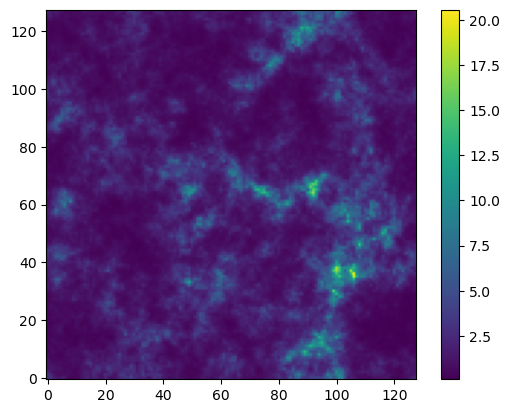

In [4]:
plot2D(sky_true.val)

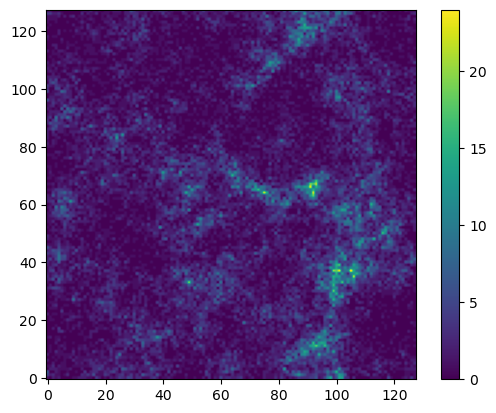

In [5]:
plot2D(data_raw)

[]

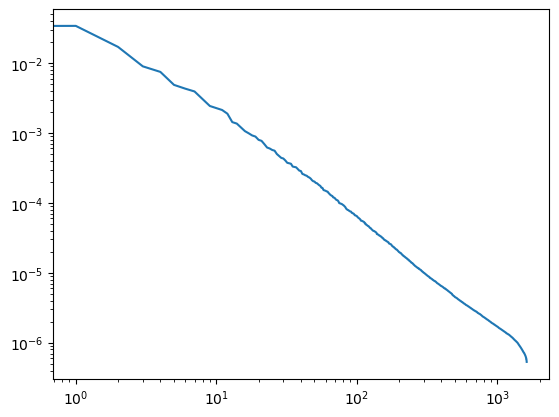

In [8]:
plt.plot(mock_spec.val)
plt.loglog()

In [9]:
np.save("data/2D_data", data_raw)
np.save("data/2D_GT", sky_true.val)
np.save("data/pspec", mock_spec.val)

## Part 3: Detector Exposure

In [7]:
detector_exp = np.load("data/2D_detector_exposure.npy")

In [8]:
detector_exp_field = ift.makeField(position_space, detector_exp)

In [9]:
print(detector_exp_field)

nifty8.Field instance
- domain      = DomainTuple, len: 1
* RGSpace(shape=(128, 128), distances=(0.0078125, 0.0078125), harmonic=False)
- val         = array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])


In [10]:
detector_exposure_op = ift.makeOp(detector_exp_field)

In [11]:
sr2 = detector_exposure_op @ sky

In [12]:
detector_mock = sr2(xi_true)

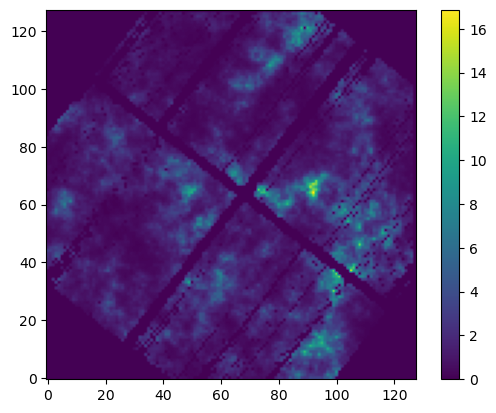

In [13]:
plot2D(detector_mock.val)

In [14]:
detector_data_raw = np.random.poisson(detector_mock.val)

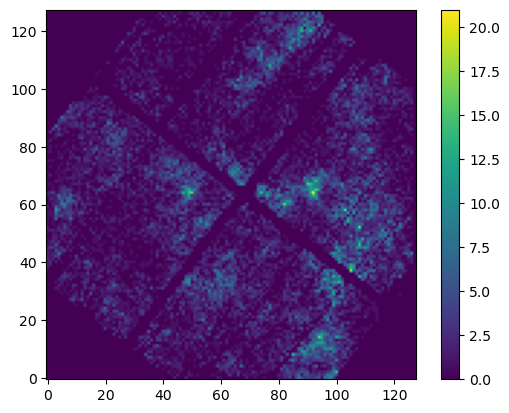

In [15]:
plot2D(detector_data_raw)

In [16]:
np.save("data/2D_detector_data", detector_data_raw)